In [1]:
import os
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [2]:
# Get File Names
folder_path = os.path.join(os.path.abspath(''), '..', 'Data', 'Generated', 'Barabasi')
barabasi = os.path.join(folder_path, '100_Barabási–Albert_(10000,2).npy')
bar_fit_low = os.path.join(folder_path, '100_BADiscreteFitness_(10000,2)_0,223.npy')
bar_fit_high = os.path.join(folder_path, '100_BADiscreteFitness_(10000,2)_0,991.npy')

In [3]:
# Load Networks
avg_degrees = np.load(barabasi)
ad_bar = avg_degrees/100

avg_degrees = np.load(bar_fit_low)
ad_bar_fit_low = avg_degrees/100

avg_degrees = np.load(bar_fit_high)
ad_bar_fit_high = avg_degrees/100

In [4]:
n = 10000
m = 2

t = np.arange(1, n - m + 1)
k_mod_bar = ad_bar[:,0]
k_mod_bar_fit_low = ad_bar_fit_low[:,0]
k_mod_bar_fit_high = ad_bar_fit_high[:,0]

In [5]:
# Custom library + Polynomial
library_functions = [
    lambda x, y : x / y
]
library_function_names = [
    lambda x, y : x + '/' + y,
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

In [6]:
model = ps.SINDy(
    differentiation_method=ps.FiniteDifference(drop_endpoints=True),
    feature_library=custom_library + ps.PolynomialLibrary(degree=3),
    optimizer=ps.STLSQ(threshold=1e-2, alpha=0.5),
    feature_names=['K', 't']
)

In [7]:
# First column is the degree the second one is the time
X_bar = np.stack((k_mod_bar, t), axis=-1)
X_bar_fit_low = np.stack((k_mod_bar_fit_low, t), axis=-1)
X_bar_fit_high = np.stack((k_mod_bar_fit_high, t), axis=-1)

In [8]:
model.fit(X_bar)
k_sim_bar = model.simulate([2,1], t=t)[:,0]
print('Barabasi Normal')
model.print()

model.fit(X_bar_fit_low)
k_sim_bar_fit_low = model.simulate([2,1], t=t)[:,0]
print('Barabasi w/ low fitness')
model.print()

model.fit(X_bar_fit_high)
k_sim_bar_fit_high = model.simulate([2,1], t=t)[:,0]
print('Barabasi w/ high fitness')
model.print()

C:\Users\David Contreras\anaconda3\envs\dddu\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.07507e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Contreras\anaconda3\envs\dddu\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.07507e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Barabasi Normal
K' = 0.478 K/t
t' = 1.000 1


C:\Users\David Contreras\anaconda3\envs\dddu\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5973e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Contreras\anaconda3\envs\dddu\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5973e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Barabasi w/ low fitness
K' = 0.214 K/t
t' = 1.000 1


C:\Users\David Contreras\anaconda3\envs\dddu\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.91566e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Contreras\anaconda3\envs\dddu\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.91566e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Barabasi w/ high fitness
K' = 0.628 K/t
t' = 1.000 1


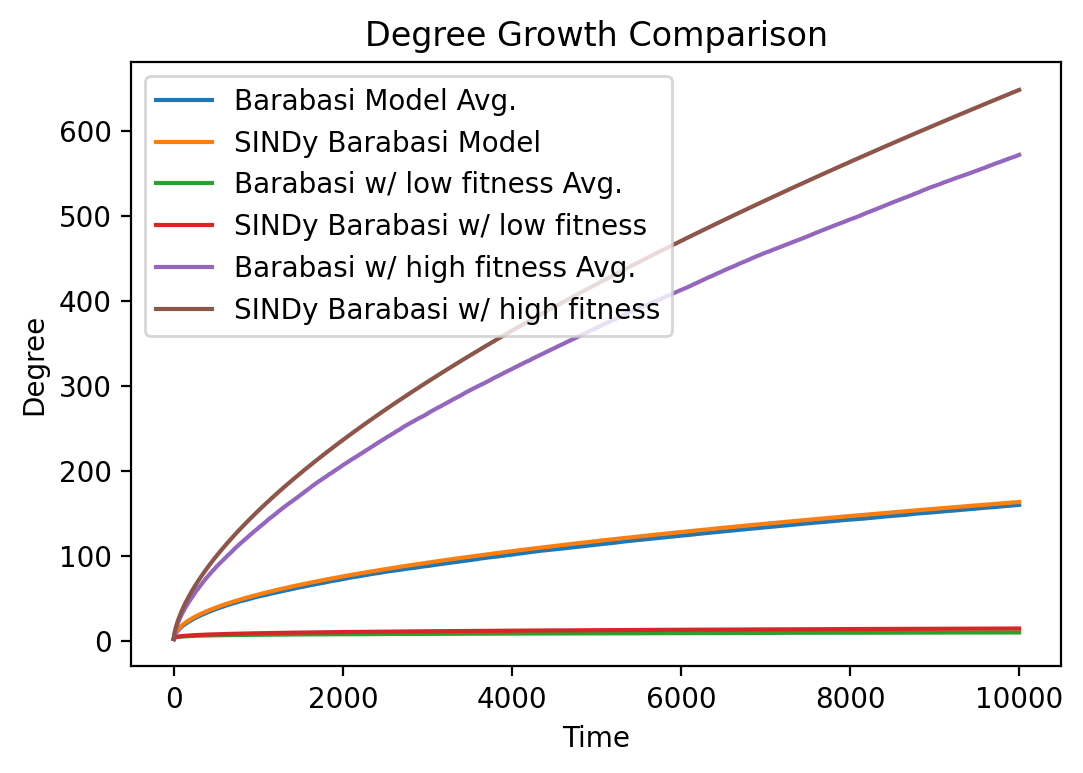

In [9]:
fig = plt.figure(figsize=(6,4), dpi= 200, facecolor='w', edgecolor='k')
plt.plot(t, k_mod_bar)
plt.plot(t, k_sim_bar)
plt.plot(t, k_mod_bar_fit_low)
plt.plot(t, k_sim_bar_fit_low)
plt.plot(t, k_mod_bar_fit_high)
plt.plot(t, k_sim_bar_fit_high)
plt.title('Degree Growth Comparison')
plt.xlabel('Time')
plt.ylabel('Degree')
plt.legend(['Barabasi Model Avg.', 'SINDy Barabasi Model',
            'Barabasi w/ low fitness Avg.', 'SINDy Barabasi w/ low fitness',
            'Barabasi w/ high fitness Avg.', 'SINDy Barabasi w/ high fitness'])